# 07wk-035: 아이스크림(이상치) / 의사결정나무

최규빈  
2023-10-16

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-weIAPJ89acBOc2V3_0HMcX&si=Lqw2fusURrQqchzH>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.tree
import matplotlib.pyplot as plt 
import seaborn as sns

# 3. Data

In [2]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 200
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

,temp,ice_sales
0,-4.1,200.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
...,...,...
95,12.4,17.508688
96,13.4,17.105376
97,14.7,17.164930
98,15.0,18.555388


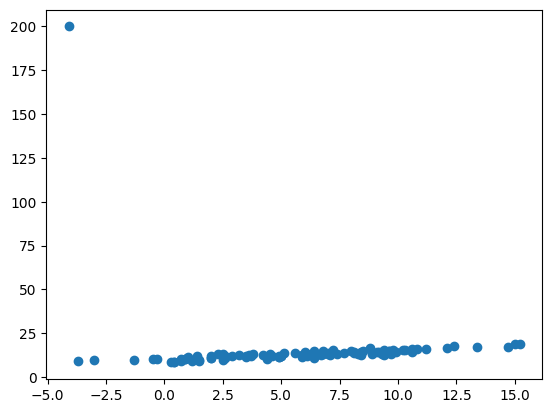

In [3]:
plt.plot(df_train.temp,df_train.ice_sales,'o')

# 4. 분석

`-` 분석: 의사결정나무

In [4]:
# step1
X = df_train[['temp']]
y = df_train['ice_sales']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step3 
predictr.fit(X,y)
# step4 
df_train['ice_sales_hat'] = predictr.predict(X)

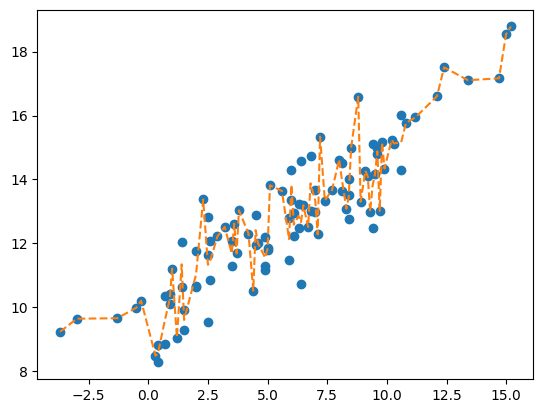

In [5]:
# plt.plot(df_train.temp,df_train.ice_sales,'o')
# plt.plot(df_train.temp,df_train.ice_sales_hat,'--')
plt.plot(df_train.temp[1:],df_train.ice_sales[1:],'o')
plt.plot(df_train.temp[1:],df_train.ice_sales_hat[1:],'--')

`-` 12.5~18 구간사이의 unseen data를 가상으로 만들고 예측값을 살펴보자.

In [6]:
XX = df_test = pd.DataFrame({'temp':np.linspace(12.5,18,100)})

In [7]:
df_test['ice_sales_hat'] = predictr.predict(XX)

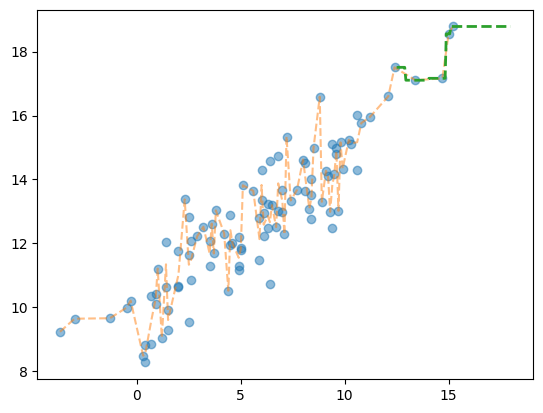

In [8]:
plt.plot(df_train.temp[1:],df_train.ice_sales[1:],'o',color='C0',alpha=0.5)
plt.plot(df_train.temp[1:],df_train.ice_sales_hat[1:],'--',color='C1',alpha=0.5)
plt.plot(df_test.temp,df_test.ice_sales_hat,'--',color='C2',linewidth=2)

`-` -15~0 구간사이의 unseen data를 가상으로 만들고 예측값을 살펴보자.

In [9]:
XX = df_test = pd.DataFrame({'temp':np.linspace(-15,0,100)})

In [10]:
df_test['ice_sales_hat'] = predictr.predict(XX)

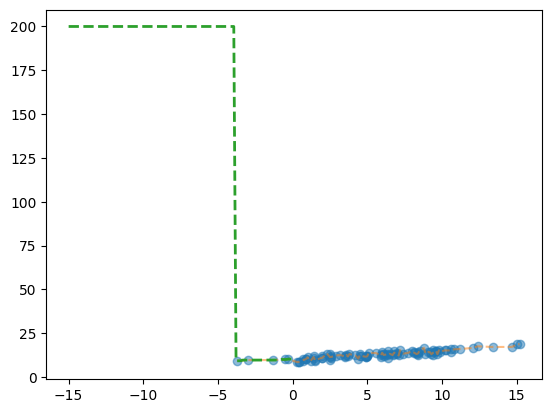

In [11]:
plt.plot(df_train.temp[1:],df_train.ice_sales[1:],'o',color='C0',alpha=0.5)
plt.plot(df_train.temp[1:],df_train.ice_sales_hat[1:],'--',color='C1',alpha=0.5)
plt.plot(df_test.temp,df_test.ice_sales_hat,'--',color='C2',linewidth=2)

-   뭐 이 데이터에서는 최선이지 않을까?

# 6. HW

`-` 없어요. 다른과목 중간고사 준비 잘하세요!